In [1]:
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
from os.path import dirname
from os import getcwd
import sys

sys.path.append(dirname(getcwd()))

from src.graphs.matchday_graph import MatchDayGraph

In [2]:
now = datetime.now()
today = datetime(now.year, now.month, now.day) # set time to 00:00:00
saturday = today + timedelta(days=5-today.weekday())
sunday = today + timedelta(days=6-today.weekday())
print(f'saturday: {saturday}, sunday: {sunday}')

saturday: 2023-04-29 00:00:00, sunday: 2023-04-30 00:00:00


In [3]:
# Crear un graf
G = MatchDayGraph(sunday).graph

2023-04-25 16:46:29 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: scrapybot)
2023-04-25 16:46:29 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.1, Twisted 22.10.0, Python 3.10.9 (main, Dec 15 2022, 18:18:30) [Clang 14.0.0 (clang-1400.0.29.202)], pyOpenSSL 23.1.1 (OpenSSL 3.1.0 14 Mar 2023), cryptography 40.0.2, Platform macOS-12.6-x86_64-i386-64bit
2023-04-25 16:46:29 [scrapy.crawler] INFO: Overridden settings:
{}
2023-04-25 16:46:29 [py.warnings] WARNING: /Users/pau_matas/Desktop/Projectes/ManiScouting/.env/lib/python3.10/site-packages/scrapy/utils/request.py:232: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version

2023-04-25 16:49:11 [matplotlib.pyplot] DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-04-25 16:49:11 [matplotlib.pyplot] DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-04-25 16:49:11 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-04-25 16:49:11 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/Users/pau_matas/Desktop/Projectes/ManiScouting/.env/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-25 16:49:11 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/Users/pau_matas/Desktop/Projectes/ManiScouting/.env/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700

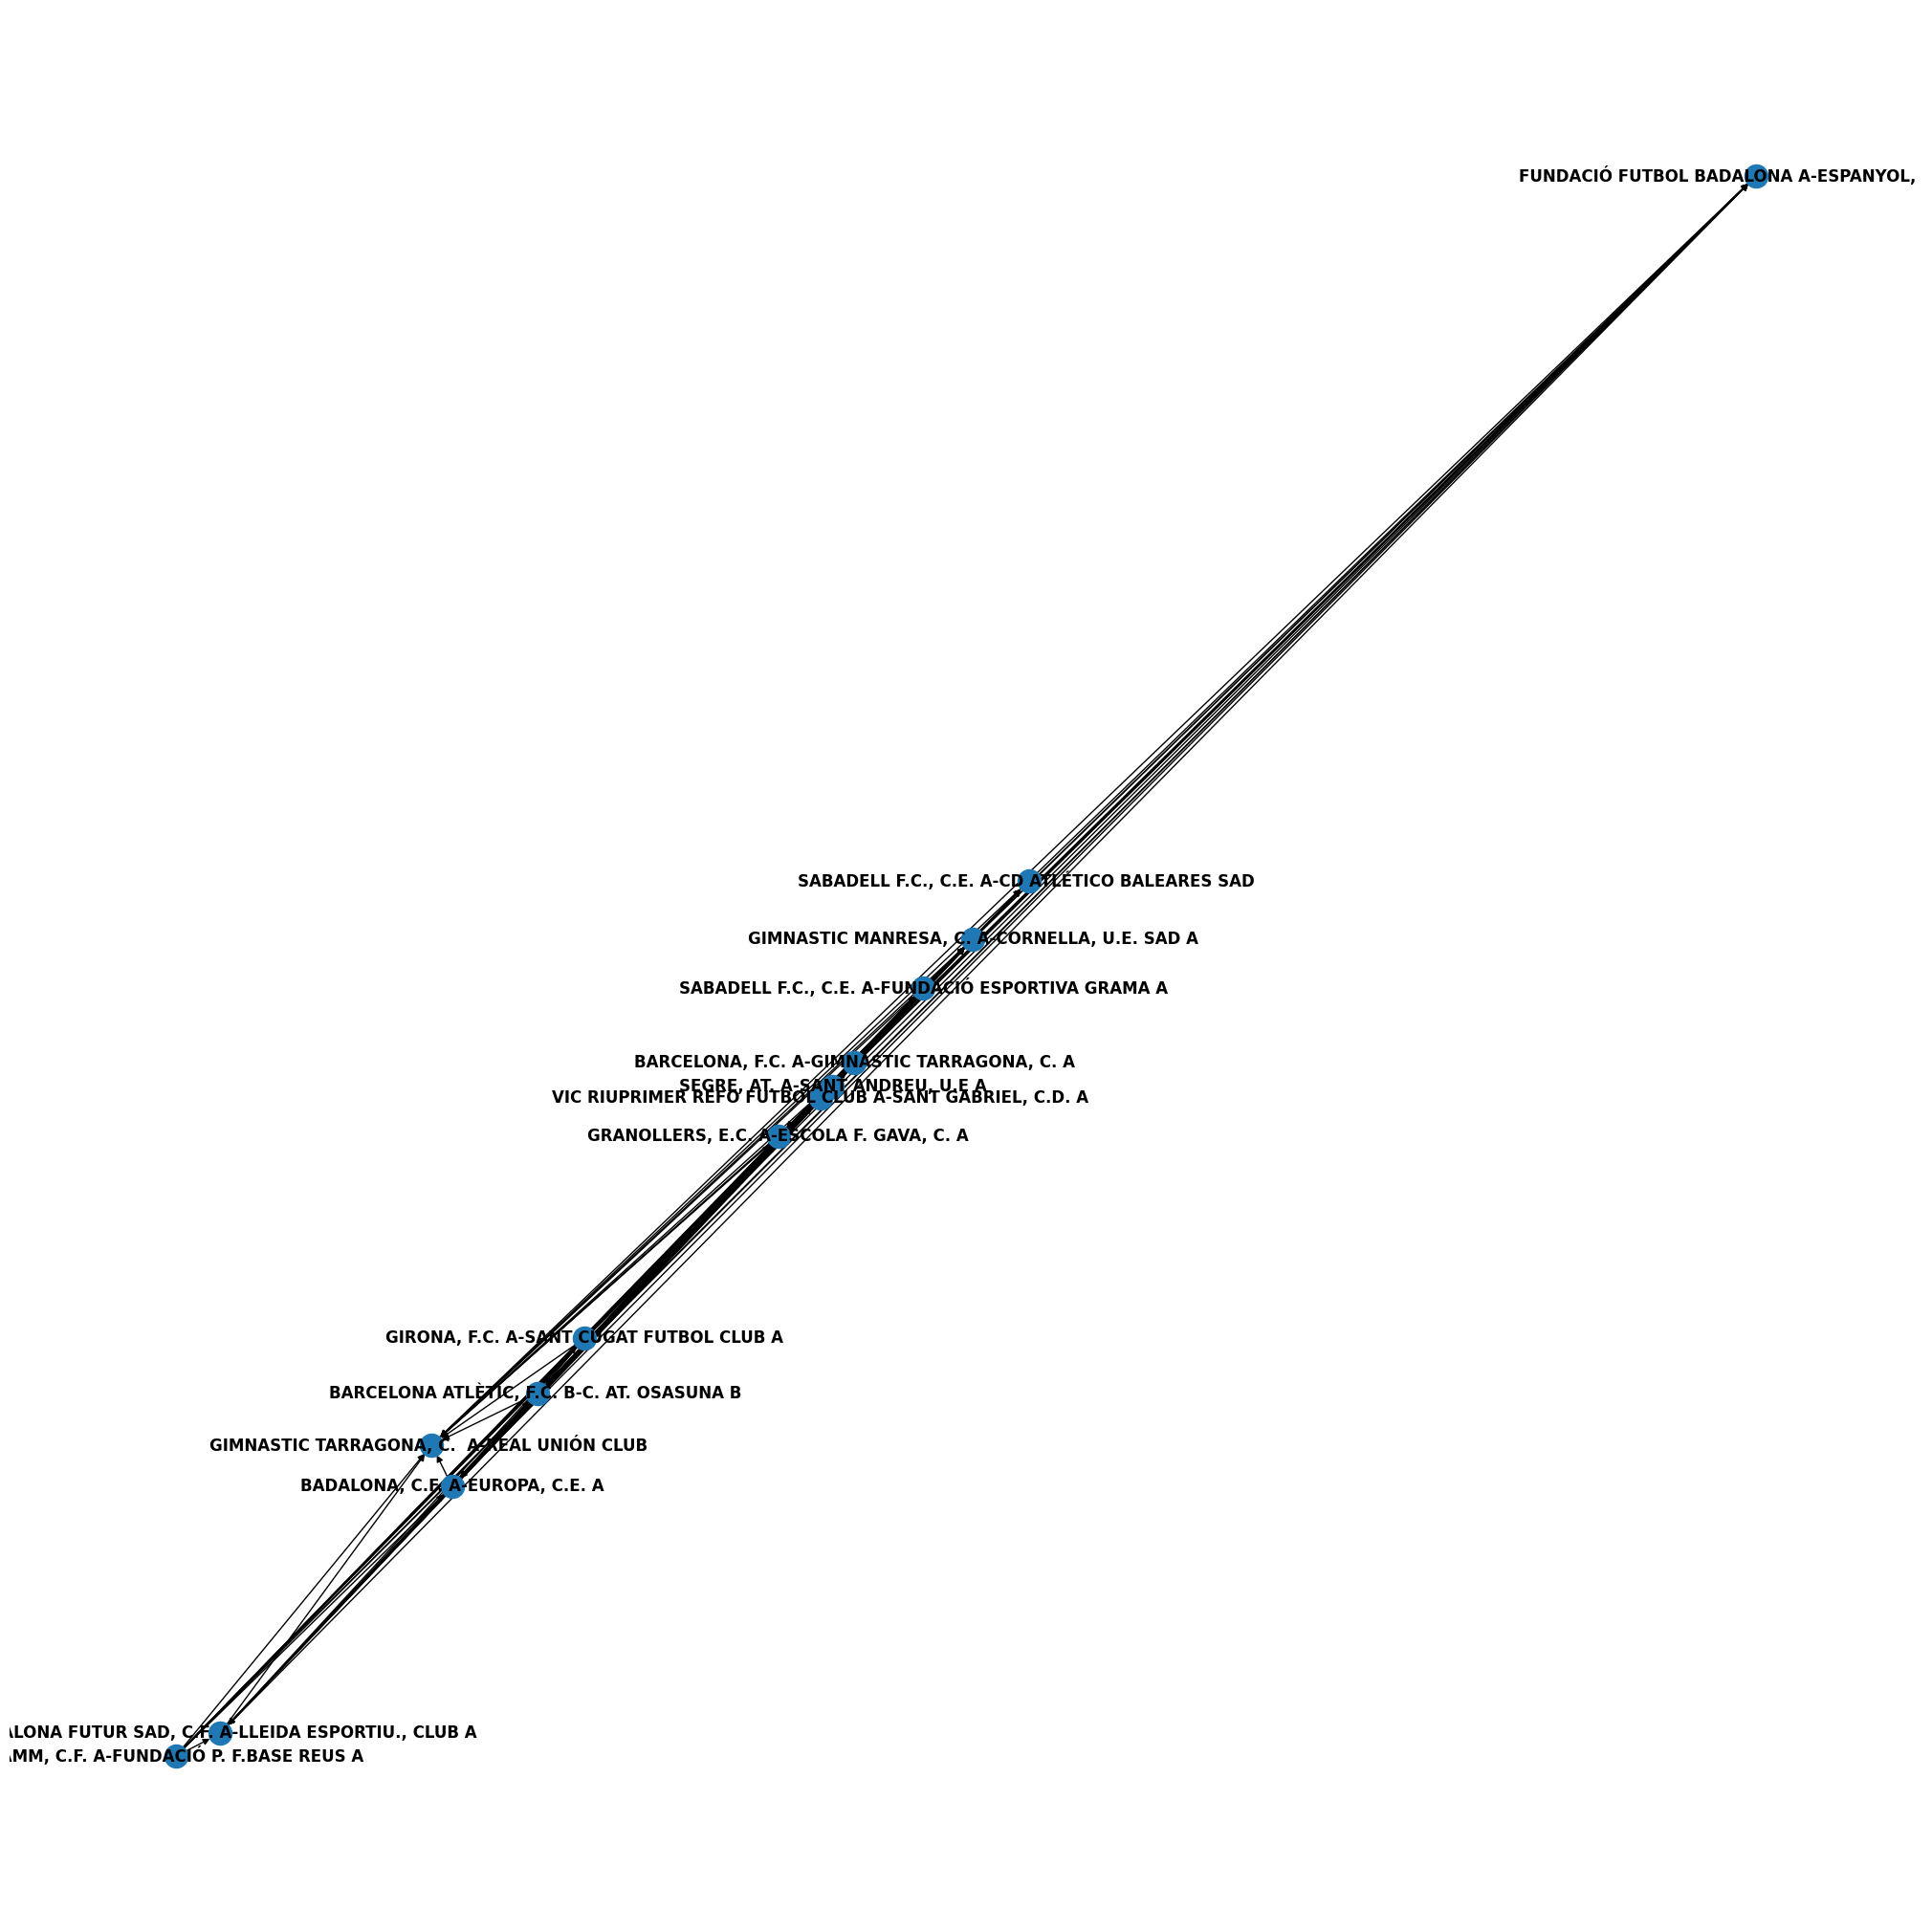

In [4]:
# Visualitzar el graf
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [5]:
G.edges()

OutEdgeView([('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'GIRONA, F.C. A-SANT CUGAT FUTBOL CLUB A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'SEGRE, AT. A-SANT ANDREU, U.E A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'VIC RIUPRIMER REFO FUTBOL CLUB A-SANT GABRIEL, C.D. A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'BARCELONA, F.C. A-GIMNASTIC TARRAGONA, C. A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'BADALONA, C.F. A-EUROPA, C.E. A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'BADALONA FUTUR SAD, C.F. A-LLEIDA ESPORTIU., CLUB A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'SABADELL F.C., C.E. A-FUNDACIÓ ESPORTIVA GRAMA A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'BARCELONA ATLÈTIC, F.C. B-C. AT. OSASUNA B '), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'GRANOLLERS, E.C. A-ESCOLA F. GAVA, C. A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'GIMNASTIC MANRESA, C. A-CORNELLA, U.E. SAD A'), ('DAMM, C.F. A-FUNDACIÓ P. F.BASE REUS A', 'SABADELL F.C., C.E. A-CD ATLÉTICO BALEARE